In [5]:
# Load some test data
import pandas as pd
holdout_data = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv')
# holdout_data.head()
holdout_data.info()
# holdout_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Label Encoder is a sklearn function that can essentially map or assign values that are categorical like month or days, and assign them an int value
# This is just something cool that I learned that I wanted to test and further theorize, however, it might be better to just assign key value pairs.

bank_data = holdout_data.dropna().copy()

month_mapping = {
    'jan': 0,
    'feb': 1,
    'mar': 2,
    'apr': 3,
    'may': 4,
    'jun': 5,
    'jul': 6,
    'aug': 7,
    'sep': 8,
    'oct': 9,
    'nov': 10,
    'dec': 11
}

bank_data['month'] = bank_data['month'].map(month_mapping)



features = ['age', 'default', 'education']
X = pd.get_dummies(bank_data[features], drop_first=True)
y = bank_data['month']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

clf = DecisionTreeRegressor()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

-0.12842105484818767

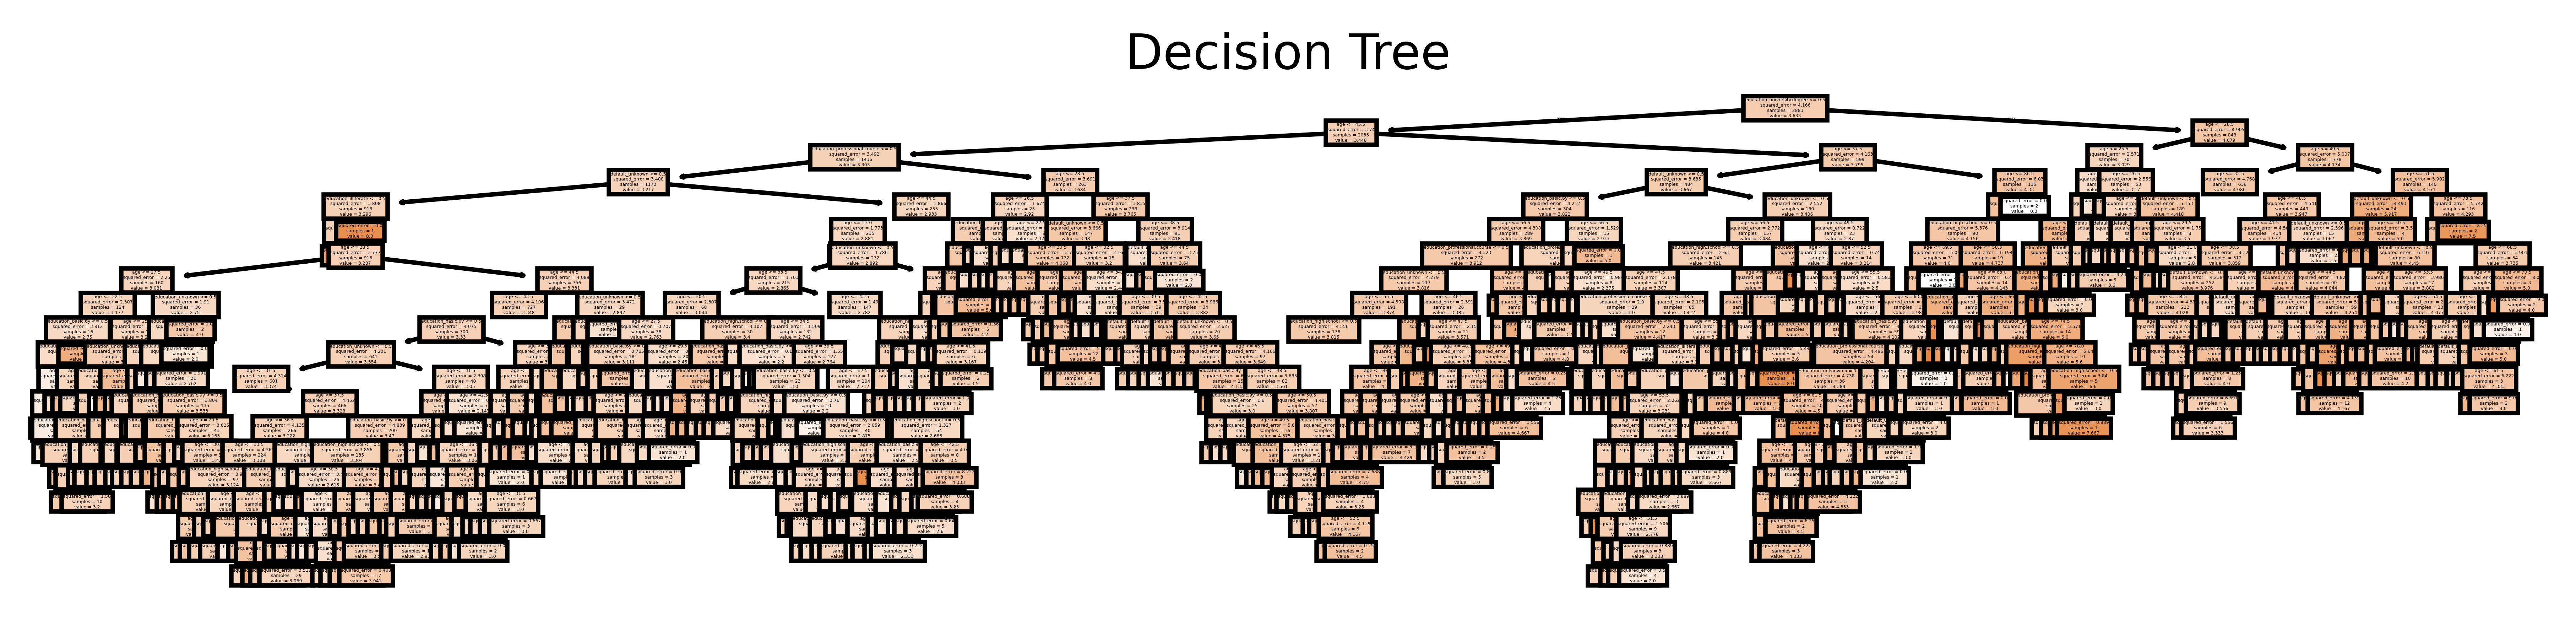

In [21]:

import matplotlib.pyplot as plt
fn=X.columns

fig, ax = plt.subplots(figsize=(10, 2), dpi=900)

tree.plot_tree(clf,
               feature_names=fn,
               filled=True,
               ax=ax);

ax.set_title('Decision Tree', fontsize=11)
fig.savefig('decision_tree.png')